In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error as MAE

In [5]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [6]:
train['datetime'] = pd.to_datetime(train['datetime']) 
test['datetime'] = pd.to_datetime(test['datetime']) 

# Preprocess

In [7]:
train['am+pm'] = train['price_am']+train['price_pm']
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek

In [8]:
test['am+pm'] = test['price_am']+test['price_pm']
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek

<AxesSubplot:ylabel='Frequency'>

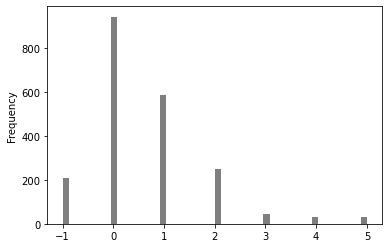

In [9]:
import matplotlib.pyplot as plt 
plt.figure()
train['price_am'].plot.hist(color="k", alpha=0.5, bins=50)

<AxesSubplot:xlabel='datetime'>

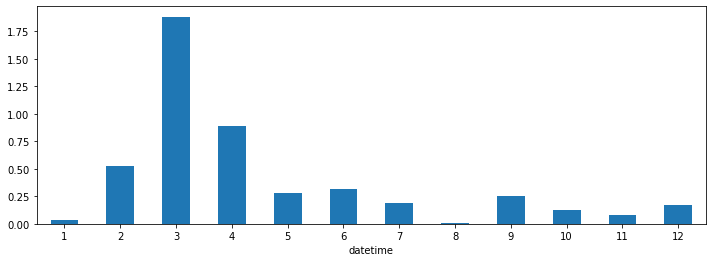

In [10]:
fig, axs = plt.subplots(figsize = (12, 4))
train.groupby(train['datetime'].dt.month)['price_pm'].mean().plot(kind = 'bar', rot = 0, ax = axs)

<AxesSubplot:xlabel='datetime'>

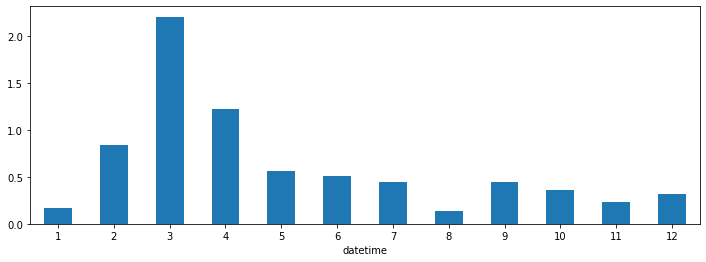

In [11]:
fig, axs = plt.subplots(figsize = (12, 4))
train.groupby(train['datetime'].dt.month)['price_am'].mean().plot(kind = 'bar', rot = 0, ax = axs)

<AxesSubplot:xlabel='datetime'>

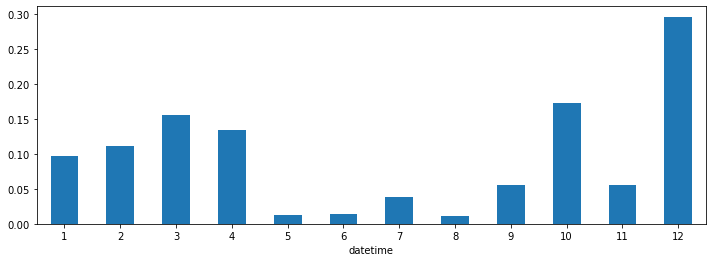

In [12]:
fig, axs = plt.subplots(figsize = (12, 4))
train.groupby(train['datetime'].dt.month)['client'].mean().plot(kind = 'bar', rot = 0, ax = axs)

<AxesSubplot:xlabel='datetime'>

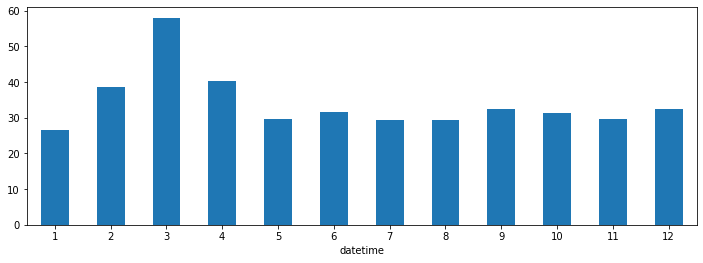

In [13]:
fig, axs = plt.subplots(figsize = (12, 4))
train.groupby(train['datetime'].dt.month)['y'].mean().plot(kind = 'bar', rot = 0, ax = axs)

# Model XGBoostRegress 

In [14]:
X_train = train.drop(['y','datetime'], axis=1)
y_train = train['y']
X_test = test.drop(['datetime'], axis=1)
from xgboost import XGBRegressor
import sklearn
xgb = XGBRegressor()
param_grid = {'max_depth':[5, 6], 
              'n_estimators': [130, 150, 170], 
              'learning_rate' : [0.1]}
model_xgb = sklearn.model_selection.GridSearchCV(estimator = xgb, param_grid = param_grid, n_jobs = -1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Độ quan trọng của các feature

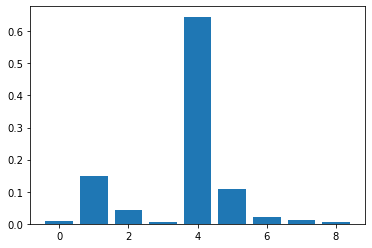

9

In [15]:
import xgboost as xgb
from matplotlib import pyplot
from xgboost import plot_importance
bst = xgb.XGBRegressor(max_depth = 6,
                    n_estimators = 100).fit(X_train , y_train)
y_pred = bst.predict(X_test)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()
len(bst.feature_importances_)

#  Kết Quả 

In [16]:
import numpy as np
sample = pd.read_csv('../datasets/sample_submit.csv',header=None)
sample[1] = np.array(y_pred) + 1 
sample[0] = pd.to_datetime(sample[0])
sample.to_csv('submit2.csv',header = False, index = False)